# gradient normalisation and momentum implementation



In [23]:
import networks
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

In [24]:
# load datasets

data_dir = Path("data")
square_large_train = pd.read_csv(data_dir / "regression" / "square-large-training.csv", index_col=0)
square_large_test = pd.read_csv(data_dir / "regression" / "square-large-test.csv", index_col=0)
steps_large_train = pd.read_csv(data_dir / "regression" / "steps-large-training.csv", index_col=0)
steps_large_test = pd.read_csv(data_dir / "regression" / "steps-large-test.csv", index_col=0)
multimodal_large_train = pd.read_csv(data_dir / "regression" / "multimodal-large-training.csv")
multimodal_large_test = pd.read_csv(data_dir / "regression" / "multimodal-large-test.csv")


# square large train

In [3]:
layers = [
    {"output_dim": 30, "activation": "relu", "init": "he"},
    {"output_dim": 30, "activation": "relu", "init": "he"},
    {"activation": "linear", "init": "normal"}
]

mlp = networks.MLP(layers, input=square_large_train[["x"]].T)


initializing layer 0 using he initialization
initializing layer 1 using he initialization
initializing layer 2 using normal initialization


In [4]:
norm = networks.assets.Normalizator(square_large_train)

square_large_train_norm = norm(square_large_train)
square_large_test_norm = norm(square_large_test)

In [14]:
max_epochs = 5000

initializing layer 0 using he initialization
initializing layer 1 using he initialization
initializing layer 2 using normal initialization
Epoch: 0, Loss: 10.54659274308991
Epoch: 100, Loss: 0.009570281454659327
Epoch: 200, Loss: 0.005250922229828476
Epoch: 300, Loss: 0.002931512696304722
Epoch: 400, Loss: 0.0019496694670872916
Epoch: 500, Loss: 0.0015482070568162709
Epoch: 600, Loss: 0.0013377028164193855
Epoch: 700, Loss: 0.0011604837784641123
Epoch: 800, Loss: 0.001048995754314871
Epoch: 900, Loss: 0.0009799136190421574
Epoch: 1000, Loss: 0.0009347658812348353
Epoch: 1100, Loss: 0.0008985996619253944
Epoch: 1200, Loss: 0.0008668064524505785
Epoch: 1300, Loss: 0.0008400417553850057
Epoch: 1400, Loss: 0.0008138174120831926
Epoch: 1500, Loss: 0.0007914663839977697
Epoch: 1600, Loss: 0.0007702626122819475
Epoch: 1700, Loss: 0.0007491449371680836
Epoch: 1800, Loss: 0.0007303361546264084
Epoch: 1900, Loss: 0.0007132831273421416
Epoch: 2000, Loss: 0.0006977533912976507
Epoch: 2100, Loss: 0

Text(0.5, 1.0, 'Loss of the model with momentum decay 0.9')

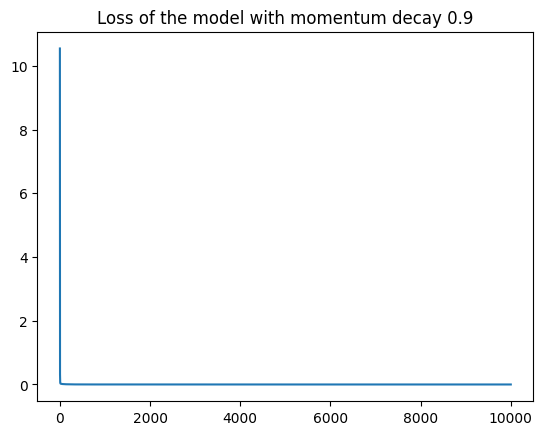

In [7]:
mlp = networks.MLP(layers, input=square_large_train_norm[["x"]].T)

losses = mlp.train(square_large_train_norm[["x"]].T.to_numpy(), square_large_train_norm[["y"]].T.to_numpy(), learning_rate=0.01, max_epochs=max_epochs, batch_size=256, momentum=True, momentum_rate=0.9)


plt.plot(losses)
plt.title("Loss of the model with momentum decay 0.9")

MSE: 1.9437944788326533


Text(0.5, 1.0, 'Prediction of the model with momentum decay 0.9, num of epochs: 50000')

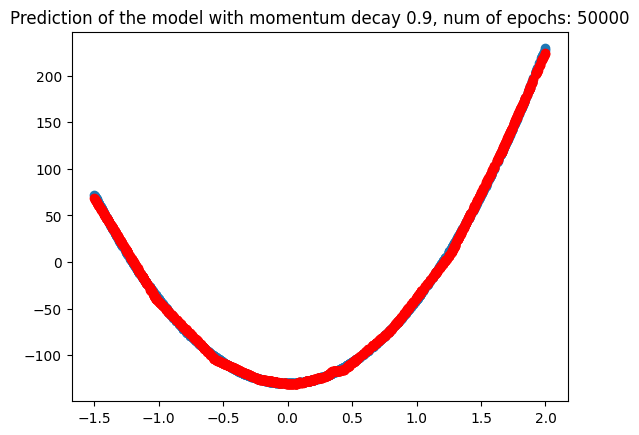

In [7]:
y_hat = mlp.full_forward_pass(square_large_train_norm[["x"]].T)

plt.scatter(square_large_train["x"], square_large_train["y"])
plt.scatter(square_large_train["x"], norm.denorm(y_hat.T, index="y"), color="red")

print("MSE:", np.mean((square_large_train["y"] - norm.denorm(y_hat.T, index="y").to_numpy().flatten())**2))
plt.title(f"Prediction of the model with momentum decay 0.9, num of epochs: {max_epochs}")

MSE: 70.29676381783264


Text(0.5, 1.0, 'Prediction of the model with momentum decay 0.9, num of epochs: 50000')

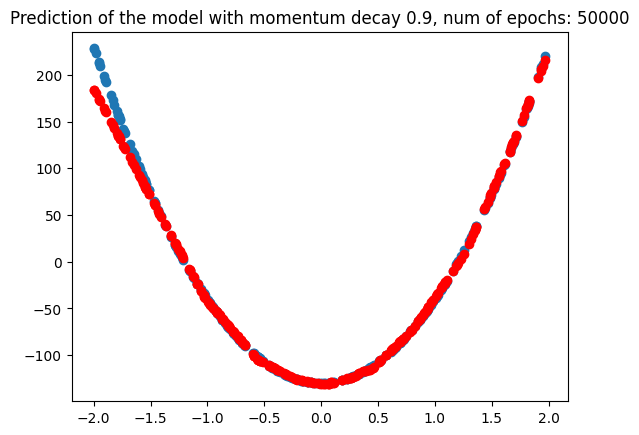

In [8]:
y_hat = mlp.full_forward_pass(square_large_test_norm[["x"]].T)

plt.scatter(square_large_test["x"], square_large_test["y"])
plt.scatter(square_large_test["x"], norm.denorm(y_hat.T, index="y"), color="red")

print("MSE:", np.mean((square_large_test["y"] - norm.denorm(y_hat.T, index="y").to_numpy().flatten())**2))
plt.title("Prediction of the model with momentum decay 0.9, num of epochs: 50000")

initializing layer 0 using he initialization
initializing layer 1 using he initialization
initializing layer 2 using normal initialization
Epoch: 0, Loss: 1.2513306386724747
Epoch: 100, Loss: 0.026337798835155333
Epoch: 200, Loss: 0.016610074895742084
Epoch: 300, Loss: 0.012812520042936506
Epoch: 400, Loss: 0.010378199904812225
Epoch: 500, Loss: 0.00860935062074864
Epoch: 600, Loss: 0.007051389821650567
Epoch: 700, Loss: 0.005654131336546833
Epoch: 800, Loss: 0.0044518766164080206
Epoch: 900, Loss: 0.00352319217744164
Epoch: 1000, Loss: 0.0027691287666319
Epoch: 1100, Loss: 0.002172546381456347
Epoch: 1200, Loss: 0.0017341145296238447
Epoch: 1300, Loss: 0.0014252408051978246
Epoch: 1400, Loss: 0.0012014606362680796
Epoch: 1500, Loss: 0.0010247767013833243
Epoch: 1600, Loss: 0.0008799671054895715
Epoch: 1700, Loss: 0.0007611023720981152
Epoch: 1800, Loss: 0.0006637111304359895
Epoch: 1900, Loss: 0.0005865902445534484
Epoch: 2000, Loss: 0.0005254502092657727
Epoch: 2100, Loss: 0.00047288

Text(0.5, 1.0, 'Loss of the model with squared gradient decay 0.9')

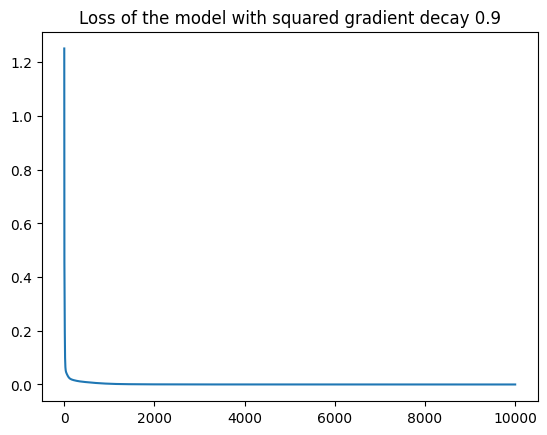

In [5]:
mlp = networks.MLP(layers, input=square_large_train_norm[["x"]].T)

losses = mlp.train(square_large_train_norm[["x"]].T.to_numpy(), square_large_train_norm[["y"]].T.to_numpy(), learning_rate=0.01, max_epochs=10000, batch_size=256, rms_prop=True, squared_gradient_decay=0.9)


plt.plot(losses)
plt.title("Loss of the model with squared gradient decay 0.9")

MSE: 171.19966661306586


Text(0.5, 1.0, 'Prediction of the model with squared gradient decay 0.9, num of epochs: 10000')

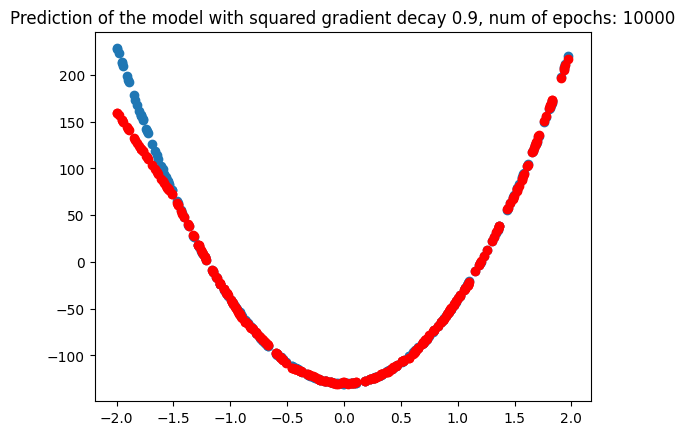

In [6]:
y_hat = mlp.full_forward_pass(square_large_test_norm[["x"]].T)

plt.scatter(square_large_test["x"], square_large_test["y"])
plt.scatter(square_large_test["x"], norm.denorm(y_hat.T, index="y"), color="red")

print("MSE:", np.mean((square_large_test["y"] - norm.denorm(y_hat.T, index="y").to_numpy().flatten())**2))
plt.title("Prediction of the model with squared gradient decay 0.9, num of epochs: 10000")

reshuffle

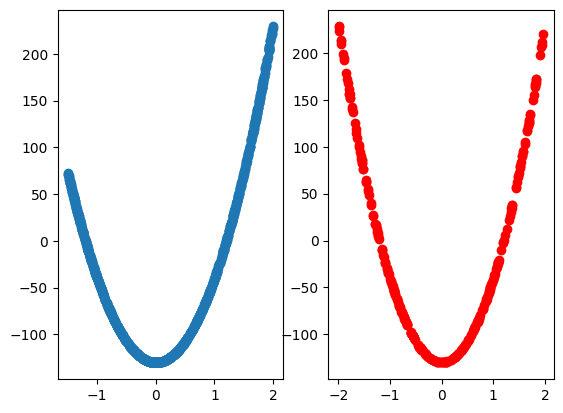

In [7]:
plt.subplot(1, 2, 1)
plt.scatter(square_large_train["x"], square_large_train["y"])
plt.subplot(1, 2, 2)
plt.scatter(square_large_test["x"], square_large_test["y"], c="red")
plt.title("difference in shape of train and test data")

In [5]:
from sklearn.model_selection import train_test_split

joined_square = pd.concat([square_large_train, square_large_test])


# Splitting the square_large dataset into train and test sets
square_large_train2, square_large_test2 = train_test_split(joined_square, test_size=0.2, random_state=42)

# Printing the shapes of the train and test sets
print("Train set shape:", square_large_train2.shape)
print("Test set shape:", square_large_test2.shape)

norm2 = networks.assets.Normalizator(square_large_train2)
square_large_test_norm2 = norm2(square_large_test2)
square_large_train_norm2 = norm2(square_large_train2)


Train set shape: (1040, 2)
Test set shape: (260, 2)


initializing layer 0 using he initialization
initializing layer 1 using he initialization
initializing layer 2 using normal initialization
Epoch: 0, Loss: 16.08216417903548
Epoch: 100, Loss: 0.025135684656133715
Epoch: 200, Loss: 0.013177241288777035
Epoch: 300, Loss: 0.007400589941805092
Epoch: 400, Loss: 0.004666840599548282
Epoch: 500, Loss: 0.0031857740110349275
Epoch: 600, Loss: 0.0022754615079099098
Epoch: 700, Loss: 0.0017017400787775875
Epoch: 800, Loss: 0.0013256288406350493
Epoch: 900, Loss: 0.0010566116565531008
Epoch: 1000, Loss: 0.0008883863385985908
Epoch: 1100, Loss: 0.0007500879517492912
Epoch: 1200, Loss: 0.0006497174644345747
Epoch: 1300, Loss: 0.0005743962226055926
Epoch: 1400, Loss: 0.0005188460195916991
Epoch: 1500, Loss: 0.0004777169039760006
Epoch: 1600, Loss: 0.0004457413122785828
Epoch: 1700, Loss: 0.0004222980226711949
Epoch: 1800, Loss: 0.00040332261393305317
Epoch: 1900, Loss: 0.0003874250385813695
Epoch: 2000, Loss: 0.00035609820620801367
Epoch: 2100, Loss:

Text(0.5, 1.0, 'Loss of the model with momentum decay 0.9')

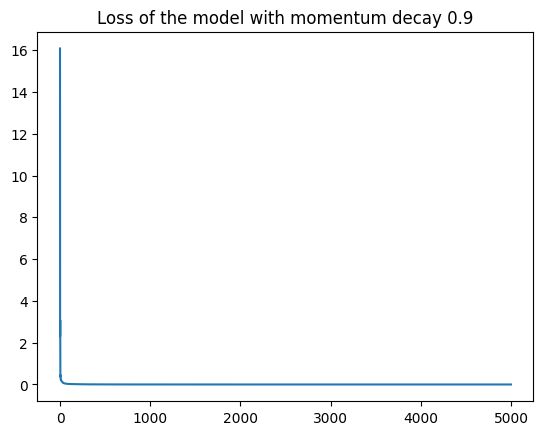

In [10]:
mlp = networks.MLP(layers, input=square_large_train_norm2[["x"]].T)

losses = mlp.train(square_large_train_norm2[["x"]].T.to_numpy(), square_large_train_norm2[["y"]].T.to_numpy(), learning_rate=0.01, max_epochs=max_epochs, batch_size=256, momentum=True, momentum_decay=0.9)


plt.plot(losses)
plt.title("Loss of the model with momentum decay 0.9")

print("Training loss on the last epoch:", losses[-1])

MSE: 1.9258954464273024


Text(0.5, 1.0, 'Prediction of the model with momentum decay 0.9, num of epochs: 5000 \n on randomlly split data')

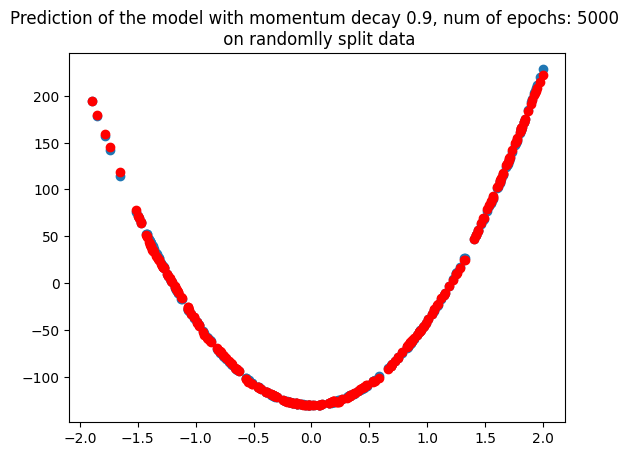

In [16]:
y_hat = mlp.full_forward_pass(square_large_test_norm2[["x"]].T)

plt.scatter(square_large_test2["x"], square_large_test2["y"])
plt.scatter(square_large_test2["x"], norm2.denorm(y_hat.T, index="y"), color="red")

print("MSE:", np.mean((square_large_test2["y"] - norm2.denorm(y_hat.T, index="y").to_numpy().flatten())**2))
plt.title(f"Prediction of the model with momentum decay 0.9, num of epochs: {max_epochs} \n on randomlly split data")

initializing layer 0 using he initialization
initializing layer 1 using he initialization
initializing layer 2 using normal initialization
Epoch: 0, Loss: 1.1446563420040066
Epoch: 100, Loss: 0.03400530988763387
Epoch: 200, Loss: 0.017977026865870604
Epoch: 300, Loss: 0.011010955347459838
Epoch: 400, Loss: 0.007105677401525958
Epoch: 500, Loss: 0.004898361749376042
Epoch: 600, Loss: 0.0036696700417523753
Epoch: 700, Loss: 0.0028862988131056065
Epoch: 800, Loss: 0.0023222456700142495
Epoch: 900, Loss: 0.0019024340866686045
Epoch: 1000, Loss: 0.0015859285695143457
Epoch: 1100, Loss: 0.0013788026022760287
Epoch: 1200, Loss: 0.0012212834101729296
Epoch: 1300, Loss: 0.0010956680372227504
Epoch: 1400, Loss: 0.0009924053161812158
Epoch: 1500, Loss: 0.0009060670397263638
Epoch: 1600, Loss: 0.0008320834681299051
Epoch: 1700, Loss: 0.0007688446186563867
Epoch: 1800, Loss: 0.0007213185205657664
Epoch: 1900, Loss: 0.0006776605779433246
Epoch: 2000, Loss: 0.0006378082481752756
Epoch: 2100, Loss: 0.

Text(0.5, 1.0, 'Loss of the model with momentum decay 0.9')

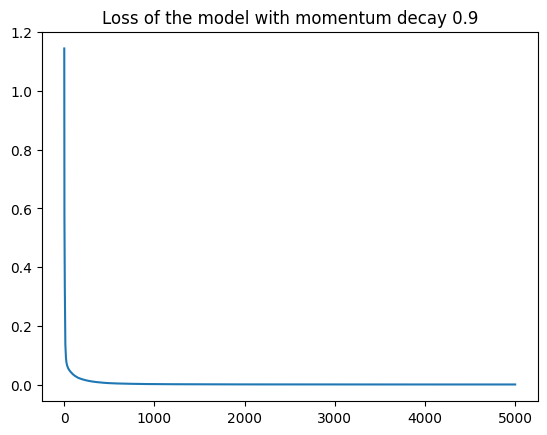

In [17]:
mlp = networks.MLP(layers, input=square_large_train_norm2[["x"]].T)

losses = mlp.train(square_large_train_norm2[["x"]].T.to_numpy(), square_large_train_norm2[["y"]].T.to_numpy(), learning_rate=0.01, max_epochs=max_epochs, batch_size=256, rms_prop=True, squared_gradient_decay=0.9)


plt.plot(losses)
plt.title("Loss of the model with momentum decay 0.9")

MSE: 3.2430940289847796


Text(0.5, 1.0, 'Prediction of the model with RMSprop with squared gradients decay 0.9,\n num of epochs: 5000 on randomlly split data')

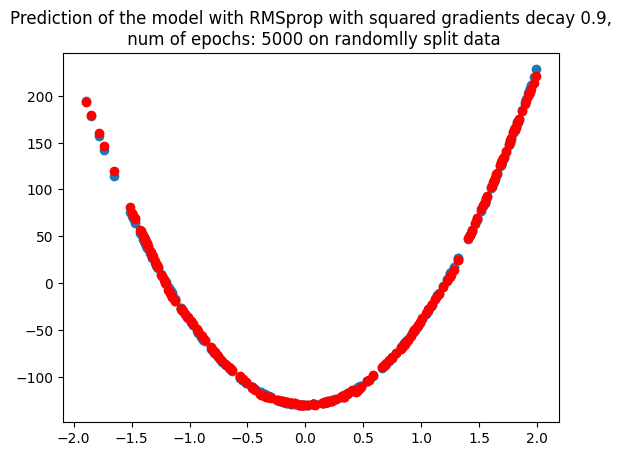

In [18]:
y_hat = mlp.full_forward_pass(square_large_test_norm2[["x"]].T)

plt.scatter(square_large_test2["x"], square_large_test2["y"])
plt.scatter(square_large_test2["x"], norm2.denorm(y_hat.T, index="y"), color="red")

print("MSE:", np.mean((square_large_test2["y"] - norm2.denorm(y_hat.T, index="y").to_numpy().flatten())**2))
plt.title(f"Prediction of the model with RMSprop with squared gradients decay 0.9,\n num of epochs: {max_epochs} on randomlly split data")

## steps large 

In [54]:
layers = [
    {"output_dim": 30, "activation": "relu", "init": "he"},
    #{"output_dim": 3, "activation": "relu", "init_method": "he"},
    {"output_dim": 20, "activation": "relu", "init": "he"},

    {"activation": "linear", "init": "normal"}
]



norm_steps = networks.assets.Normalizator(steps_large_train)
steps_large_train_norm = norm_steps(steps_large_train)
steps_large_test_norm = norm_steps(steps_large_test)

mlp_steps = networks.MLP(layers, input=steps_large_train_norm[["x"]].T)


initializing layer 0 using he initialization
initializing layer 1 using he initialization
initializing layer 2 using normal initialization


In [55]:
steps_large_train_norm[["x"]].T.to_numpy().shape[1]

10000

In [56]:
max_epochs = 1000

initializing layer 0 using he initialization
initializing layer 1 using he initialization
initializing layer 2 using normal initialization


Epoch: 0, Loss: 0.07047882902703193
Epoch: 100, Loss: 0.015693384043316664
Epoch: 200, Loss: 0.00612441241424423
Epoch: 300, Loss: 0.004344486158063175
Epoch: 400, Loss: 0.003633529635883962
Epoch: 500, Loss: 0.003238667409164856
Epoch: 600, Loss: 0.0029861197087829856
Epoch: 700, Loss: 0.0027798971103846905
Epoch: 800, Loss: 0.002627822160276255
Epoch: 900, Loss: 0.002497564020258771


Text(0.5, 1.0, 'Training Loss')

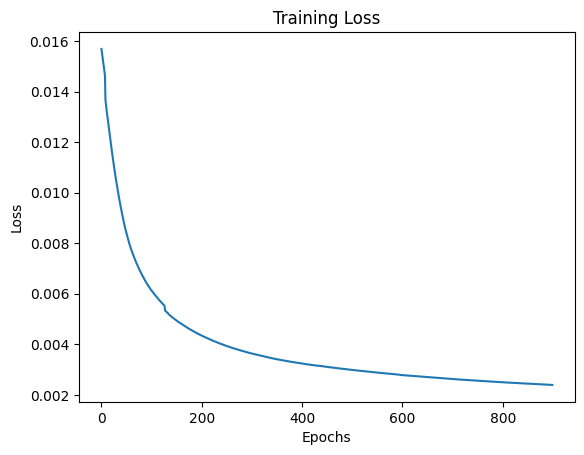

In [57]:
mlp_steps = networks.MLP(layers, input=steps_large_train_norm[["x"]].T)


losses = mlp_steps.train(steps_large_train_norm[["x"]].T.to_numpy(), steps_large_train_norm[["y"]].T.to_numpy(),
                         max_epochs=max_epochs, learning_rate = 0.001, batch_size=2)
# losses = mlp_steps.minibatch_train(steps_large_train_norm[["x"]].T.to_numpy(), steps_large_train_norm[["y"]].T.to_numpy(), 0.1, 20000)

plt.plot(losses[100:])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')

MSE on test data:  123.19875855356548


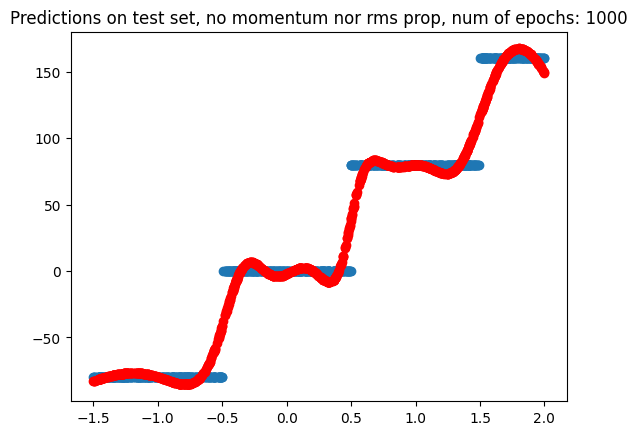

In [53]:
y_hat = mlp_steps.full_forward_pass(steps_large_test_norm[["x"]].T.to_numpy())

plt.scatter(steps_large_test["x"], steps_large_test["y"])
plt.scatter(steps_large_test["x"], norm_steps.denorm(y_hat.T, index="y"), color="red")
plt.title(f"Predictions on test set, no momentum nor rms prop, num of epochs: {max_epochs}")

mse = np.mean((steps_large_test["y"] - norm_steps.denorm(y_hat.T, index="y").flatten())**2)
print("MSE on test data: ", mse)

initializing layer 0 using he initialization
initializing layer 1 using he initialization
initializing layer 2 using normal initialization
Epoch: 0, Loss: 0.07214127857597886
Epoch: 100, Loss: 0.054950618389340886
Epoch: 200, Loss: 0.0433879103922151
Epoch: 300, Loss: 0.03516645706695375
Epoch: 400, Loss: 0.023279460045851734
Epoch: 500, Loss: 0.02129993140560998
Epoch: 600, Loss: 0.02063314681366889
Epoch: 700, Loss: 0.020160599488859218
Epoch: 800, Loss: 0.019781600485629953
Epoch: 900, Loss: 0.01932803040055265


Text(0.5, 1.0, 'Training Loss')

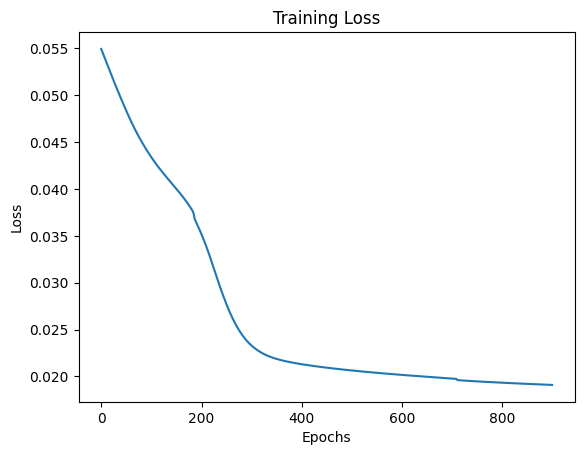

In [37]:
mlp_steps = networks.MLP(layers, input=steps_large_train_norm[["x"]].T)

momentum_decay = 0.1


losses = mlp_steps.train(steps_large_train_norm[["x"]].T.to_numpy(), steps_large_train_norm[["y"]].T.to_numpy(), momentum=True, momentum_decay=momentum_decay,
                         max_epochs=max_epochs, learning_rate = 0.002, batch_size=4)
# losses = mlp_steps.minibatch_train(steps_large_train_norm[["x"]].T.to_numpy(), steps_large_train_norm[["y"]].T.to_numpy(), 0.1, 20000)

plt.plot(losses[100:])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')

MSE on train data:  18.574444276838328


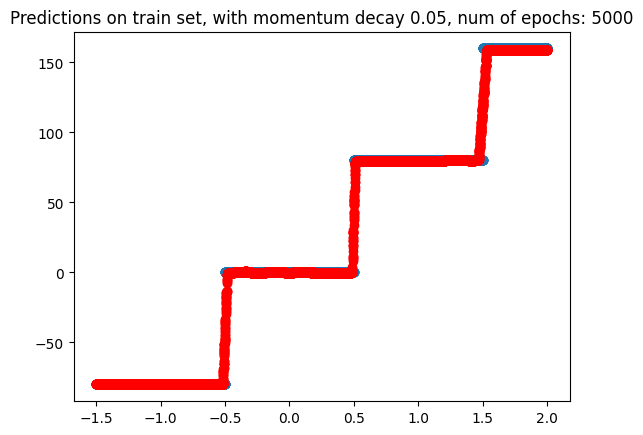

In [33]:
y_hat = mlp_steps.full_forward_pass(steps_large_train_norm[["x"]].T).to_numpy()

plt.scatter(steps_large_train["x"], steps_large_train["y"])
plt.scatter(steps_large_train["x"], norm_steps.denorm(y_hat.T, index="y"), color="red")
plt.title(f"Predictions on train set, with momentum decay {momentum_decay}, num of epochs: {max_epochs}")

mse = np.mean((steps_large_train["y"] - norm_steps.denorm(y_hat.T, index="y").flatten())**2)
print("MSE on train data: ", mse)

MSE on test data:  15.352693962364803


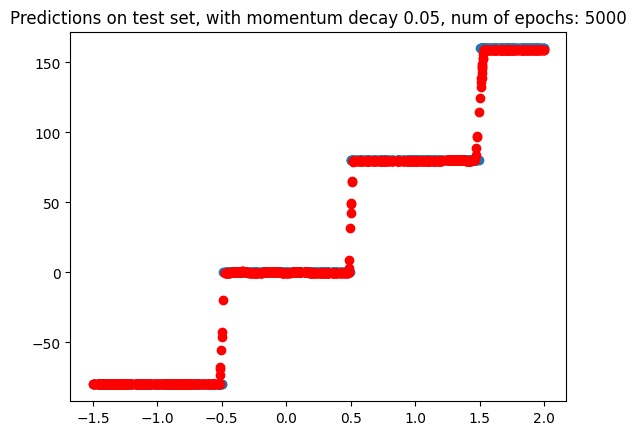

In [34]:
y_hat = mlp_steps.full_forward_pass(steps_large_test_norm[["x"]].T.to_numpy())

plt.scatter(steps_large_test["x"], steps_large_test["y"])
plt.scatter(steps_large_test["x"], norm_steps.denorm(y_hat.T, index="y"), color="red")
plt.title(f"Predictions on test set, with momentum decay {momentum_decay}, num of epochs: {max_epochs}")

mse = np.mean((steps_large_test["y"] - norm_steps.denorm(y_hat.T, index="y").flatten())**2)
print("MSE on test data: ", mse)

initializing layer 0 using he initialization
initializing layer 1 using he initialization
initializing layer 2 using normal initialization
Epoch: 0, Loss: 0.07980200814910211
Epoch: 100, Loss: 0.061380323563494564
Epoch: 200, Loss: 0.0508009758416012
Epoch: 300, Loss: 0.04010679647948193
Epoch: 400, Loss: 0.0272032735731041
Epoch: 500, Loss: 0.02153558972939999
Epoch: 600, Loss: 0.01879207808010955
Epoch: 700, Loss: 0.01710721860448614
Epoch: 800, Loss: 0.015223219569276122
Epoch: 900, Loss: 0.013197354346550134
Epoch: 1000, Loss: 0.011172391286167463
Epoch: 1100, Loss: 0.009426662912527133
Epoch: 1200, Loss: 0.008093003327078586
Epoch: 1300, Loss: 0.007176208172195356
Epoch: 1400, Loss: 0.0065201712085242464
Epoch: 1500, Loss: 0.006022751885027506
Epoch: 1600, Loss: 0.005627667417168163
Epoch: 1700, Loss: 0.005294631962912018
Epoch: 1800, Loss: 0.005008460137632154
Epoch: 1900, Loss: 0.004761649955820752
Epoch: 2000, Loss: 0.004544892390911443
Epoch: 2100, Loss: 0.004354992471396217
E

Text(0.5, 1.0, 'Training Loss')

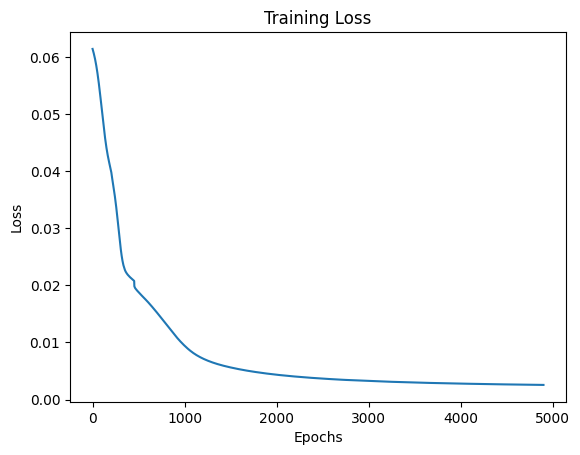

In [9]:
mlp_steps = networks.MLP(layers, input=steps_large_train_norm[["x"]].T)

squred_gradient_decay = 0.9


losses = mlp_steps.train(steps_large_train_norm[["x"]].T.to_numpy(), steps_large_train_norm[["y"]].T.to_numpy(), rms_prop=True, squared_gradient_decay=squred_gradient_decay,
                         max_epochs=5000, learning_rate = 0.002, batch_size=32)
# losses = mlp_steps.minibatch_train(steps_large_train_norm[["x"]].T.to_numpy(), steps_large_train_norm[["y"]].T.to_numpy(), 0.1, 20000)

plt.plot(losses[100:])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')

MSE on test data:  14.174005213064245


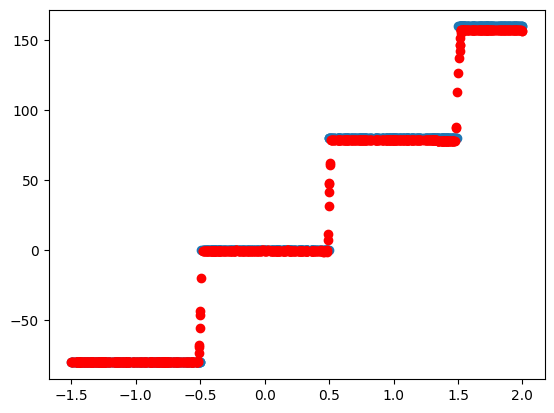

In [10]:
y_hat = mlp_steps.full_forward_pass(steps_large_test_norm[["x"]].T.to_numpy())

plt.scatter(steps_large_test["x"], steps_large_test["y"])
plt.scatter(steps_large_test["x"], norm_steps.denorm(y_hat.T, index="y"), color="red")

plt.title(f"Predictions on test set, with RMSprop with squared gradients decay {squred_gradient_decay}, num of epochs: {max_epochs}")

mse = np.mean((steps_large_test["y"] - norm_steps.denorm(y_hat.T, index="y").flatten())**2)
print("MSE on test data: ", mse)

# Multimodal large

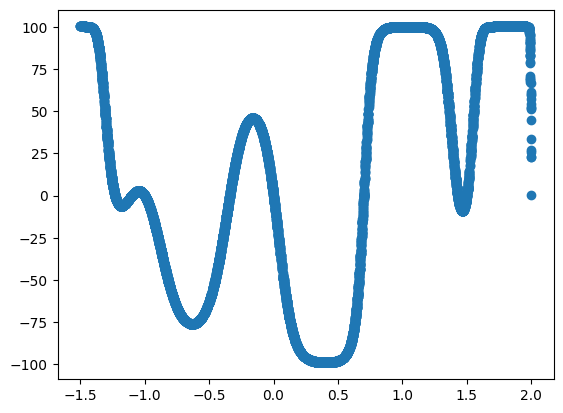

In [12]:

norm_multimodal = networks.assets.Normalizator(multimodal_large_train)

multimodal_large_train_norm = norm_multimodal(multimodal_large_train)
multimodal_large_test_norm = norm_multimodal(multimodal_large_test)

plt.scatter(multimodal_large_train["x"], multimodal_large_train["y"])

In [13]:
multimodal_large_train_norm.std()

x    1.0
y    1.0
dtype: float64

initializing layer 0 using he initialization
initializing layer 1 using he initialization
initializing layer 2 using normal initialization
Epoch: 0, Loss: 0.33171441127196066
Epoch: 100, Loss: 0.07463816466209755
Epoch: 200, Loss: 0.010263122484947016
Epoch: 300, Loss: 0.002940941311826873
Epoch: 400, Loss: 0.002340375267482782
Epoch: 500, Loss: 0.0021434453722763767
Epoch: 600, Loss: 0.002126397109698646
Epoch: 700, Loss: 0.002037259021616708
Epoch: 800, Loss: 0.00199608916315308
Epoch: 900, Loss: 0.002026327069505218
Epoch: 1000, Loss: 0.001999917045523579
Epoch: 1100, Loss: 0.001989756595371686
Epoch: 1200, Loss: 0.0020134051102449076
Epoch: 1300, Loss: 0.0019911287198653275
Epoch: 1400, Loss: 0.0019875003128494036
Epoch: 1500, Loss: 0.0019266363816933375
Epoch: 1600, Loss: 0.0018628724578754338
Epoch: 1700, Loss: 0.0018057431174763898
Epoch: 1800, Loss: 0.0018046588382666338
Epoch: 1900, Loss: 0.0017790827687591104


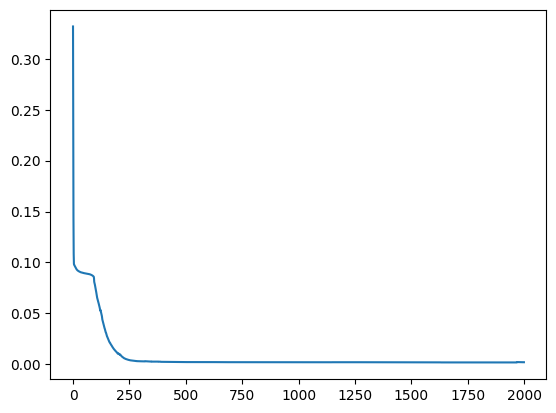

In [20]:
layers = [
    {"output_dim": 20, "activation": "relu", "init": "he"},
    {"output_dim": 20, "activation": "relu", "init": "he"},
    {"activation": "linear", "init": "normal"}
]

max_epochs = 5000

mlp_multimodal = networks.MLP(layers, input=multimodal_large_train_norm[["x"]].T)


losses = mlp_multimodal.train(multimodal_large_train_norm[["x"]].T.to_numpy(), multimodal_large_train_norm[["y"]].T.to_numpy(), max_epochs=max_epochs, batch_size=32, early_loss_stop = 1e-8, learning_rate=0.02)

plt.plot(losses)

MSE on test data:  7.122961363479482


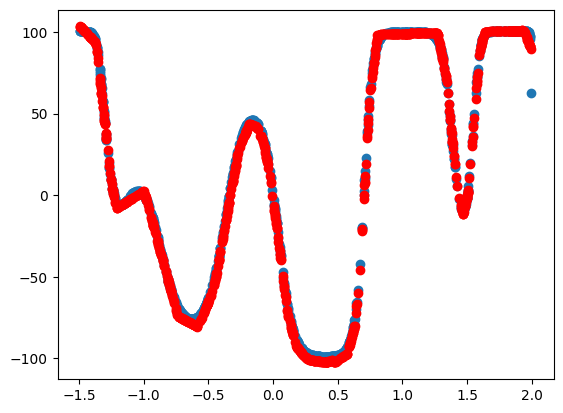

In [22]:
y_hat = mlp_multimodal.full_forward_pass(multimodal_large_test_norm[["x"]].T.to_numpy())

plt.scatter(multimodal_large_test["x"], multimodal_large_test["y"])
plt.scatter(multimodal_large_test["x"], norm_multimodal.denorm(y_hat.T, index="y"), color="red")

plt.title(f"Predictions on test set, no momentum nor rms prop, num of epochs: {max_epochs}")

mse = np.mean((multimodal_large_test["y"] - norm_multimodal.denorm(y_hat.T, index="y").flatten())**2)
print("MSE on test data: ", mse)

initializing layer 0 using he initialization
initializing layer 1 using he initialization
initializing layer 2 using normal initialization
Epoch: 0, Loss: 0.31827501903628924
Epoch: 100, Loss: 0.03364524493799352
Epoch: 200, Loss: 0.030914659144162693
Epoch: 300, Loss: 0.029736357624270335
Epoch: 400, Loss: 0.029621928044653696
Epoch: 500, Loss: 0.029583144331819005
Epoch: 600, Loss: 0.02951493387522735
Epoch: 700, Loss: 0.02947656175280328
Epoch: 800, Loss: 0.02947016369821489
Epoch: 900, Loss: 0.029533297311642916
Epoch: 1000, Loss: 0.029605802111652656
Epoch: 1100, Loss: 0.02969140916857217
Epoch: 1200, Loss: 0.029772071596648745
Epoch: 1300, Loss: 0.029830358725603152
Epoch: 1400, Loss: 0.029864076044868754
Epoch: 1500, Loss: 0.02988159126141913
Epoch: 1600, Loss: 0.029878207451494318
Epoch: 1700, Loss: 0.029851179855145692
Epoch: 1800, Loss: 0.029810938964530187
Epoch: 1900, Loss: 0.027398584714756646


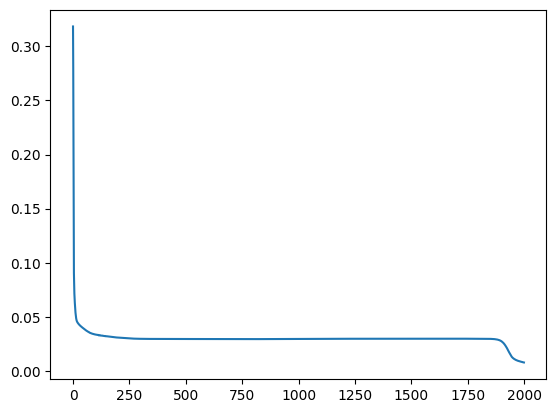

In [32]:

mlp_multimodal = networks.MLP(layers, input=multimodal_large_train_norm[["x"]].T)

momentum_decay = 0.05


losses = mlp_multimodal.train(multimodal_large_train_norm[["x"]].T.to_numpy(), multimodal_large_train_norm[["y"]].T.to_numpy(), max_epochs=max_epochs, batch_size=32, early_loss_stop = 1e-8, learning_rate=0.02, momentum=True, momentum_decay=momentum_decay)

plt.plot(losses)

MSE on test data:  22.75933411063397


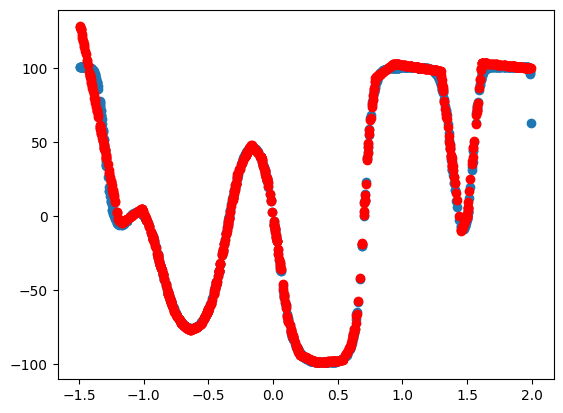

In [24]:
y_hat = mlp_multimodal.full_forward_pass(multimodal_large_test_norm[["x"]].T.to_numpy())

plt.scatter(multimodal_large_test["x"], multimodal_large_test["y"])
plt.scatter(multimodal_large_test["x"], norm_multimodal.denorm(y_hat.T, index="y"), color="red")

plt.title(f"Predictions on test set, with momentum decay {momentum_decay}, num of epochs: {max_epochs}")

mse = np.mean((multimodal_large_test["y"] - norm_multimodal.denorm(y_hat.T, index="y").flatten())**2)
print("MSE on test data: ", mse)

initializing layer 0 using he initialization
initializing layer 1 using he initialization
initializing layer 2 using normal initialization
Epoch: 0, Loss: 0.2877534724565222
Epoch: 100, Loss: 0.03266206300494266
Epoch: 200, Loss: 0.02872159210145154
Epoch: 300, Loss: 0.017903711054463842
Epoch: 400, Loss: 0.005182811978806502
Epoch: 500, Loss: 0.004391867826714463
Epoch: 600, Loss: 0.0035691416424032695
Epoch: 700, Loss: 0.0028567388753471747
Epoch: 800, Loss: 0.0023583332126449266
Epoch: 900, Loss: 0.0020911919848234416
Epoch: 1000, Loss: 0.0019571949195627634
Epoch: 1100, Loss: 0.0018862320300512508
Epoch: 1200, Loss: 0.0018492633065978488
Epoch: 1300, Loss: 0.0018232322532685031
Epoch: 1400, Loss: 0.0018070375237893412
Epoch: 1500, Loss: 0.0017967907997167736
Epoch: 1600, Loss: 0.001789171069256988
Epoch: 1700, Loss: 0.0017826093331933172
Epoch: 1800, Loss: 0.0017775134362032674
Epoch: 1900, Loss: 0.001773215987194604


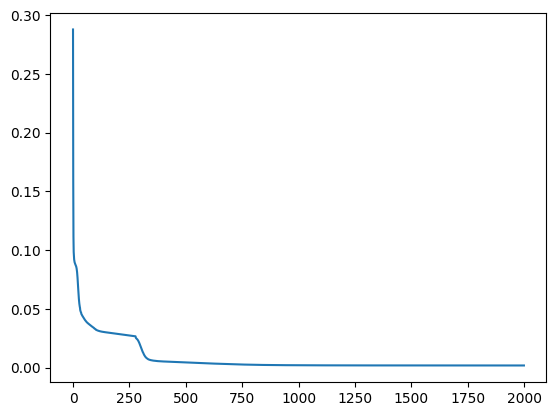

In [29]:

mlp_multimodal = networks.MLP(layers, input=multimodal_large_train_norm[["x"]].T)

squred_gradient_decay = 0.9


losses = mlp_multimodal.train(multimodal_large_train_norm[["x"]].T.to_numpy(), multimodal_large_train_norm[["y"]].T.to_numpy(), max_epochs=2000, batch_size=32, early_loss_stop = 1e-8, learning_rate=0.02, rms_prop=True, squared_gradient_decay=squred_gradient_decay)

plt.plot(losses)

MSE on test data:  4.617810229104412


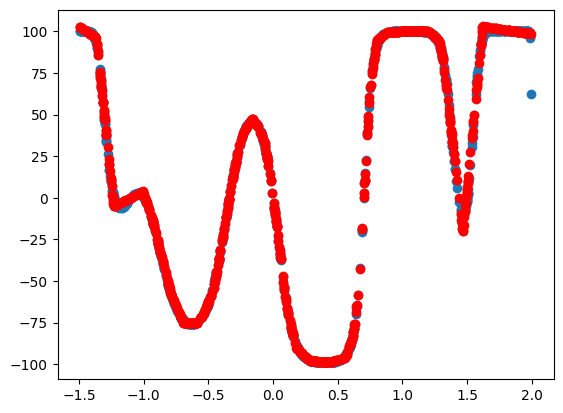

In [30]:
y_hat = mlp_multimodal.full_forward_pass(multimodal_large_test_norm[["x"]].T.to_numpy())

plt.scatter(multimodal_large_test["x"], multimodal_large_test["y"])
plt.scatter(multimodal_large_test["x"], norm_multimodal.denorm(y_hat.T, index="y"), color="red")

plt.title(f"Predictions on test set, with RMSprop with squared gradients decay {squred_gradient_decay}, num of epochs: {max_epochs}")

mse = np.mean((multimodal_large_test["y"] - norm_multimodal.denorm(y_hat.T, index="y").flatten())**2)
print("MSE on test data: ", mse)